# **APRENDIZAJE NO SUPERVISADO** 

## **INFORMACIÓN DEL DATASET**

**Link del dataset:** https://www.kaggle.com/datasets/arjunbhasin/credit-card-dataset  

## Credit Card Dataset

Normalized Credit Card Data for Clustering & Segmentation

### Acerca de este archivo

### Agregar sugerencia

Esta es la versión normalizada de la carga de mi conjunto de datos en (arjunbhasin2013). He normalizado los valores de este conjunto de datos y he agregado cadenas aleatorias para los nombres de las entidades con el fin de evitar colisiones con el conjunto de datos anterior.

### A continuación se muestra el diccionario de datos:

Este caso requiere desarrollar una segmentación de clientes para definir la estrategia de marketing. El conjunto de datos de ejemplo resume el comportamiento de uso de aproximadamente 9000 titulares de tarjetas de crédito activos durante los últimos 6 meses. El archivo está a nivel de cliente con 18 variables de comportamiento.

**CUST_ID** : Identificación del titular de la tarjeta de crédito (Categórica)

**SALDO** : Cantidad de saldo que queda en su cuenta para realizar compras

**BALANCE_FREQUENCY :** Con qué frecuencia se actualiza el saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)

**COMPRAS** : Importe de las compras realizadas desde la cuenta

**ONEOFF_PURCHASES :** Importe máximo de compra realizado de una sola vez

**INSTALLMENTS_PURCHASES** : Importe de la compra realizada a plazos

**CASH_ADVANCE** : Dinero en efectivo por adelantado entregado por el usuario

**PURCHASES_FREQUENCY** : Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compradas con frecuencia, 0 = no compradas con frecuencia)

**ONEOFFPURCHASESFREQUENCY** : La frecuencia con la que se realizan las compras de una sola vez (1 = compradas con frecuencia, 0 = no compradas con frecuencia)

**PURCHASESINSTALLMENTSFREQUENCY** : La frecuencia con la que se realizan las compras a plazos (1 = se realiza con frecuencia, 0 = no se realiza con frecuencia)

**CASHADVANCEFREQUENCY** : Con qué frecuencia se paga el efectivo por adelantado

**CASHADVANCETRX** : Número de transacciones realizadas con "Cash in Advanced"

**PURCHASES_TRX** : Número de transacciones de compra realizadas

**CREDIT_LIMIT**: Límite de la tarjeta de crédito para el usuario PAGOS : Monto del pago realizado por el usuario

**MINIMUM_PAYMENTS** : Importe mínimo de los pagos realizados por el usuario

**PRCFULLPAYMENT** : Porcentaje del pago total pagado por el usuario

**TENURE**: Tenencia del servicio de tarjeta de crédito para el usuario

# **1. Importar librerias necesarias**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import joblib


# **2. Cargar y Explorar el Conjunto de Datos**

In [33]:
# Cargar datos desde UCI Repository
data = pd.read_csv('./credit_data_norm.csv', delimiter=',')

# Inspeccionar los primeros registros
data

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.014030,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-0.009485,-0.153715,0.080447
1,0.086015,0.031820,-0.020457,-0.014534,-0.018270,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,0.002724,0.068507,0.080447
2,0.048872,0.122729,-0.004691,0.004434,-0.018270,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-0.003101,-0.153715,0.080447
3,0.005367,-0.240907,0.010110,0.022241,-0.018270,-0.016401,-0.407018,-0.119125,-0.364437,-0.034541,-0.018283,-0.038296,0.100352,-0.034170,NaN,-0.153715,0.080447
4,-0.039214,0.122729,-0.020131,-0.014142,-0.018270,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-0.008107,-0.153715,0.080447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.080658,0.122729,-0.014521,-0.014534,-0.005331,-0.020766,0.509649,-0.202458,0.468896,-0.090096,-0.026413,-0.024329,-0.116676,-0.027751,-0.010671,0.346285,-0.919553
8946,-0.081147,0.122729,-0.014340,-0.014534,-0.004936,-0.020766,0.509649,-0.202458,0.468896,-0.090096,-0.026413,-0.024329,-0.116676,-0.028731,NaN,-0.153715,-0.919553
8947,-0.080926,-0.043938,-0.017512,-0.014534,-0.011852,-0.020766,0.342982,-0.202458,0.302230,-0.090096,-0.026413,-0.027122,-0.116676,-0.032568,-0.010232,0.096285,-0.919553
8948,-0.081448,-0.043938,-0.020457,-0.014534,-0.018270,-0.019991,-0.490351,-0.202458,-0.364437,0.021015,-0.010153,-0.041089,-0.133371,-0.033134,-0.010581,0.096285,-0.919553


In [34]:
# Información del dataset
print(data.info())

# Descripción estadística
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   xslth_balance_0                           8950 non-null   float64
 1   fmeyv_balance_frequency_1                 8950 non-null   float64
 2   pwnjx_purchases_2                         8950 non-null   float64
 3   dxuli_oneoff_purchases_3                  8950 non-null   float64
 4   ojukq_installments_purchases_4            8950 non-null   float64
 5   bvnag_cash_advance_5                      8950 non-null   float64
 6   gdoka_purchases_frequency_6               8950 non-null   float64
 7   vozgu_oneoff_purchases_frequency_7        8950 non-null   float64
 8   byefw_purchases_installments_frequency_8  8950 non-null   float64
 9   jltvu_cash_advance_frequency_9            8950 non-null   float64
 10  pmfyh_cash_advance_trx_10           

# **3. Procesar Datos**

In [35]:
# Comprobar si hay valores faltantes
print(data.isnull().sum())

# Eliminar filas con valores faltantes (si las hay)
data.dropna(inplace=True)

xslth_balance_0                               0
fmeyv_balance_frequency_1                     0
pwnjx_purchases_2                             0
dxuli_oneoff_purchases_3                      0
ojukq_installments_purchases_4                0
bvnag_cash_advance_5                          0
gdoka_purchases_frequency_6                   0
vozgu_oneoff_purchases_frequency_7            0
byefw_purchases_installments_frequency_8      0
jltvu_cash_advance_frequency_9                0
pmfyh_cash_advance_trx_10                     0
jgcmz_purchases_trx_11                        0
ehdqb_credit_limit_12                         1
matvy_payments_13                             0
itzsv_minimum_payments_14                   313
ubvma_prc_full_payment_15                     0
lkrsn_tenure_16                               0
dtype: int64


In [36]:
data

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.014030,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-0.009485,-0.153715,0.080447
1,0.086015,0.031820,-0.020457,-0.014534,-0.018270,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,0.002724,0.068507,0.080447
2,0.048872,0.122729,-0.004691,0.004434,-0.018270,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-0.003101,-0.153715,0.080447
4,-0.039214,0.122729,-0.020131,-0.014142,-0.018270,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-0.008107,-0.153715,0.080447
5,0.012884,0.122729,0.006731,-0.014534,0.040987,-0.020766,0.176316,-0.202458,0.218896,-0.090096,-0.026413,-0.018743,-0.089965,-0.006567,0.020195,-0.153715,0.080447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,-0.081846,-0.377271,-0.020031,-0.014022,-0.018270,-0.020766,-0.323684,-0.035791,-0.364437,-0.090096,-0.026413,-0.038296,-0.133371,-0.033014,-0.010742,-0.153715,-0.919553
8945,-0.080658,0.122729,-0.014521,-0.014534,-0.005331,-0.020766,0.509649,-0.202458,0.468896,-0.090096,-0.026413,-0.024329,-0.116676,-0.027751,-0.010671,0.346285,-0.919553
8947,-0.080926,-0.043938,-0.017512,-0.014534,-0.011852,-0.020766,0.342982,-0.202458,0.302230,-0.090096,-0.026413,-0.027122,-0.116676,-0.032568,-0.010232,0.096285,-0.919553
8948,-0.081448,-0.043938,-0.020457,-0.014534,-0.018270,-0.019991,-0.490351,-0.202458,-0.364437,0.021015,-0.010153,-0.041089,-0.133371,-0.033134,-0.010581,0.096285,-0.919553


Ajustamos las características de los datos para que tengan una distribución uniforme. Específicamente, StandardScaler es una técnica que estandariza las características de los datos restando la media y dividiendo por la desviación estándar.

In [37]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(data)

# Convertir los datos escalados de vuelta a un DataFrame
df = pd.DataFrame(scaled_data, columns=data.columns)

# Mostrar el DataFrame escalado
df

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


In [38]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Mostrar los datos escalados y divididos
print("Conjunto de Entrenamiento (80%):")
print(X_train)
print("\nConjunto de Prueba (20%):")
print(X_test)

Conjunto de Entrenamiento (80%):
      xslth_balance_0  fmeyv_balance_frequency_1  pwnjx_purchases_2  \
7340        -0.643800                   0.505405          -0.283539   
8189        -0.750665                  -1.683224          -0.325537   
6692        -0.314333                   0.505405          -0.403988   
5213        -0.256230                   0.505405           0.019329   
5356        -0.668425                   0.505405          -0.161300   
...               ...                        ...                ...   
5734         0.047498                   0.505405          -0.473208   
5191        -0.198646                   0.505405          -0.473208   
5390        -0.754265                  -0.182450          -0.429378   
860          2.089937                   0.505405          -0.473208   
7270         0.064762                   0.505405          -0.188942   

      dxuli_oneoff_purchases_3  ojukq_installments_purchases_4  \
7340                 -0.115123                  

# **4. Selección del Modelo y Evaluación del Número de Clusters**

### 4.1 Encontrando el valor óptimo de clusters (K) - METODO DEL CODO

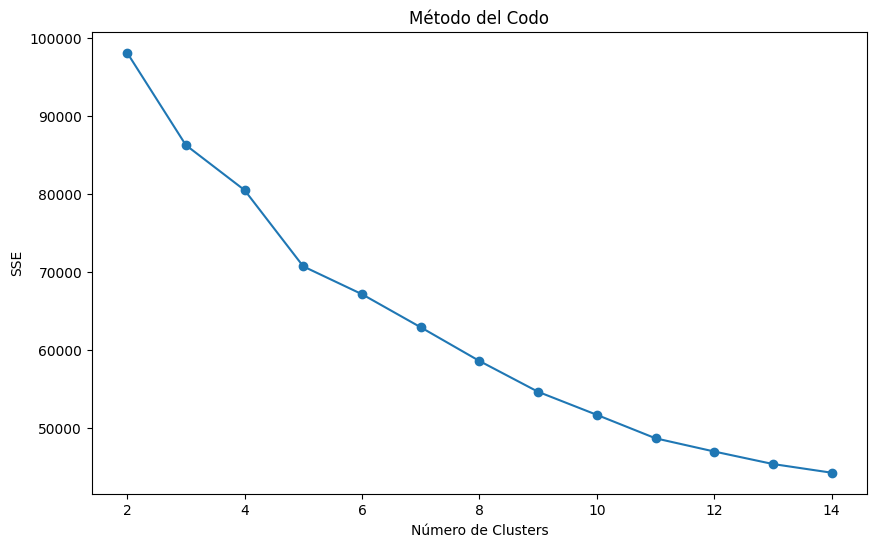

In [39]:
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()


### 4.2 Encontrando el valor óptimo de clusters (K) - MÉTODO DE COEFICIENTE DE SILUETA

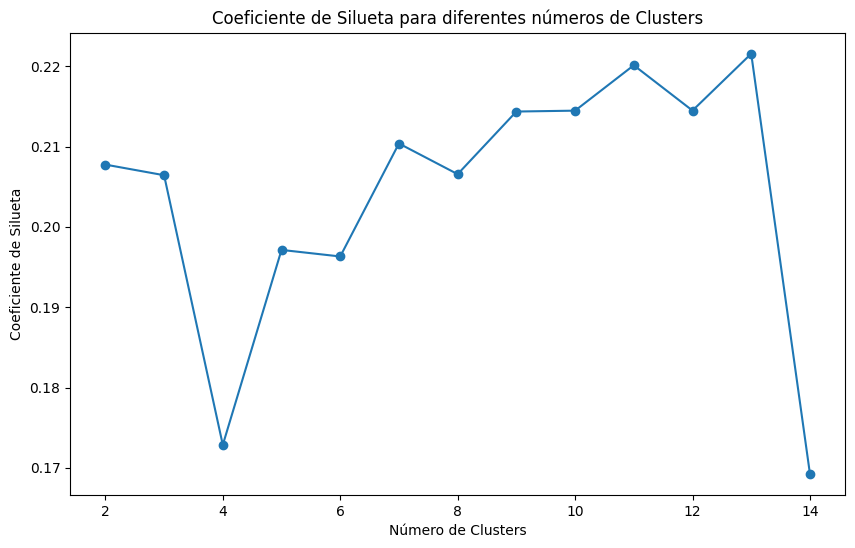

In [40]:
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()


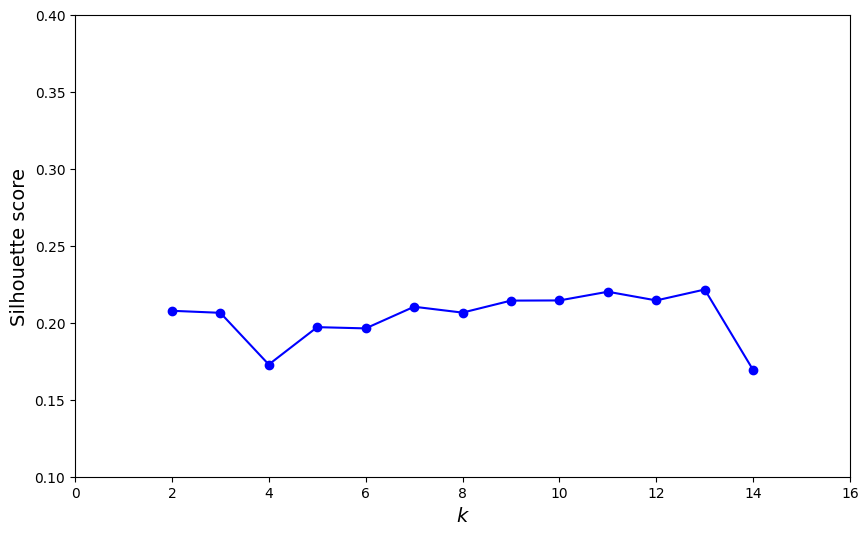

In [41]:
from sklearn.metrics import silhouette_score

# Creamos una lista de modelos de Means ajustados para diferentes números de clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(1, 15)]

# Calculamos los coeficientes de silueta para cada modelo KMeans (excepto el primero, con un solo cluster)
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 6))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a n)
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Establecemos los límites de los ejes de X e Y para enfocar la visualización en un rango específico
plt.axis([0, 16, 0.1, 0.40])

plt.show()

In [42]:
# Encontrar el índice del máximo coeficiente de silueta
max_index = np.argmax(silhouette_scores)

# Calcular el valor de k correspondiente al máximo coeficiente de silueta
mejor_K = max_index + 2

# Imprimir el valor de k que maximiza el coeficiente de silueta
print("El valor óptimo de k es:", mejor_K)

El valor óptimo de k es: 13


In [43]:
print(kmeans_per_k)

# Imprimir los coeficientes de silueta para cada modelo KMeans ajustado
silhouette_scores

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42), KMeans(n_clusters=10, random_state=42), KMeans(n_clusters=11, random_state=42), KMeans(n_clusters=12, random_state=42), KMeans(n_clusters=13, random_state=42), KMeans(n_clusters=14, random_state=42)]


[0.20775298415217994,
 0.20642968914412732,
 0.1728569606948446,
 0.1971313025098061,
 0.19631523048895616,
 0.21037921418428904,
 0.20656181859366932,
 0.21435823593616862,
 0.21446860110175597,
 0.22012016828450084,
 0.21447905276575005,
 0.22155590153697532,
 0.1692699844411055]

# **5. Aplicar K-Means con el Número de Clusters Elegido**

In [44]:
# Declaramos el valor de k óptimo
k = 13
kmeans = KMeans(n_clusters=k, random_state=42)

y_pred = kmeans.fit_predict(X_train)

In [46]:
# Calculamos las localizaciones de cada uno de centroides de cada clustering
# Accedemos a los centroides finales de los clusters identificados por KMeans
centroids = kmeans.cluster_centers_

print(centroids.shape)
print(centroids)

(13, 17)
[[-6.94952963e-01 -2.36496897e+00 -3.21601935e-01 -2.38522896e-01
  -3.21755590e-01 -2.86557489e-01 -6.34285063e-01 -4.56795846e-01
  -5.09006911e-01 -4.88239477e-01 -3.58999745e-01 -4.37116905e-01
  -1.90877307e-01 -1.57933303e-01 -2.94011682e-01  2.45153180e-01
   1.99862141e-01]
 [ 2.38014436e+00  4.07446118e-01 -2.55868522e-01 -1.83696552e-01
  -2.67352835e-01  1.62125928e+00 -5.80264619e-01 -3.32087474e-01
  -4.72269088e-01  1.08285438e+00  7.94453205e-01 -3.29496303e-01
   1.48735191e+00  4.73079254e-01  6.16716233e-01 -4.94072168e-01
   1.40383738e-01]
 [-2.49404038e-01  3.34653251e-01  1.93390759e-01  4.13758174e-01
  -3.03107235e-01 -3.56397397e-01  7.22337738e-01  1.74829210e+00
  -4.82798287e-01 -4.57693045e-01 -3.62093212e-01  1.55752998e-01
   1.19990344e-01 -8.64147473e-02 -1.75057490e-01  1.95239959e-01
   2.50737704e-01]
 [-2.66515639e-01  3.61971163e-01 -6.99862934e-02 -2.34118985e-01
   2.64958265e-01 -3.35784578e-01  9.37781682e-01 -3.54143049e-01
   1.14619

In [52]:
# Añadir las etiquetas de los clusters al DataFrame original
# X_train['Cluster'] = y_pred

# Mostrar las etiquetas producidas
# X_train["Cluster"].value_counts()

print(y_pred)

[ 2  0 12 ...  6 11  3]


In [55]:
# Añadir las etiquetas de los clusters al DataFrame original
X_train_df = X_train.copy()
X_train_df['Cluster'] = y_pred

# Mostrar las etiquetas producidas
X_train_df["Cluster"].value_counts()

Cluster
12    1764
3     1180
0      776
2      577
9      515
10     513
7      513
6      433
1      381
4      129
11      83
8       28
5       16
Name: count, dtype: int64

In [56]:
# Mostramos el dataframe con la nueva columna de cluster
X_train_df

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16,Cluster
7340,-0.643800,0.505405,-0.283539,-0.115123,-0.458839,-0.468655,0.840707,2.091162,-0.926522,-0.681953,-0.479437,0.514983,-0.962575,-0.455386,-0.285017,-0.537727,0.355181,2
8189,-0.750665,-1.683224,-0.325537,-0.359160,-0.109948,-0.468655,0.009969,-0.686280,0.120197,-0.681953,-0.479437,-0.358760,-0.962575,-0.423848,-0.299782,0.812467,0.355181,0
6692,-0.314333,0.505405,-0.403988,-0.359160,-0.295296,0.034143,-0.405401,-0.686280,-0.298491,-0.268963,0.099258,-0.358760,-0.907916,-0.116456,-0.156774,-0.537727,0.355181,12
5213,-0.256230,0.505405,0.019329,-0.215247,0.440580,1.232340,0.840707,0.146953,0.748227,-0.268963,-0.334763,-0.080751,0.403907,1.026422,-0.242353,-0.256438,0.355181,3
5356,-0.668425,0.505405,-0.161300,0.042155,-0.458839,-0.468655,-0.197715,0.702443,-0.926522,-0.681953,-0.479437,-0.279329,0.813852,-0.354331,-0.234233,-0.256438,0.355181,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.047498,0.505405,-0.473208,-0.359160,-0.458839,-0.174274,-1.236139,-0.686280,-0.926522,1.795997,0.822627,-0.597054,-0.689279,-0.469433,-0.181087,-0.537727,0.355181,7
5191,-0.198646,0.505405,-0.473208,-0.359160,-0.458839,1.767537,-1.236139,-0.686280,-0.926522,1.795997,0.967300,-0.597054,-0.415982,0.196172,-0.251289,-0.537727,0.355181,7
5390,-0.754265,-0.182450,-0.429378,-0.359160,-0.355284,-0.468655,0.900046,-0.686280,0.867852,-0.681953,-0.479437,-0.358760,-0.962575,-0.583684,-0.320150,1.150015,-3.458970,6
860,2.089937,0.505405,-0.473208,-0.359160,-0.458839,5.191968,-1.236139,-0.686280,-0.926522,1.383007,3.860774,-0.597054,1.770390,2.733127,0.308793,-0.256438,0.355181,11


In [57]:
# Evaluar el modelo
silhouette_avg = silhouette_score(X_train, y_pred)
print(f'Coeficiente de Silueta: {silhouette_avg}')

Coeficiente de Silueta: 0.22155590153697532


### Realizamos algunas pruebas con nuevo datos

In [59]:
# Definir nuevas muestras para predecir sus clusters
X_new = np.array([
    [-0.080006, -0.059089, -0.018512, -0.014534, -0.014030, -0.020766, -0.323684, -0.202458, -0.281104, -0.090096, -0.026413, -0.035502, -0.116676, -0.030191, -0.009485, -0.153715, 0.080447],    
    [0.086015, 0.031820, -0.020457, -0.014534, -0.018270, 0.115918, -0.490351, -0.202458, -0.364437, 0.076571, 0.006107, -0.041089, 0.083658, 0.046724, 0.002724, 0.068507, 0.080447],    
    [0.048872, 0.122729, -0.004691, 0.004434, -0.018270, -0.020766, 0.509649, 0.797542, -0.364437, -0.090096, -0.026413, -0.007569, 0.100352, -0.021905, -0.003101, -0.153715, 0.080447],    
    [-0.039214, 0.122729, -0.020131, -0.014142, -0.018270, -0.020766, -0.407018, -0.119125, -0.364437, -0.090096, -0.026413, -0.038296, -0.109998, -0.020796, -0.008107, -0.153715, 0.080447],    
    [0.012884, 0.122729, 0.006731, -0.014534, 0.040987, -0.020766, 0.176316, -0.202458, 0.218896, -0.090096, -0.026413, -0.018743, -0.089965, -0.006567, 0.020195, -0.153715, 0.080447]
])

# Escalar las nuevas muestras
X_new_scaled = scaler.transform(X_new)

# Predecir los clusters de las nuevas muestras utilizando el modelo KMeans previamente entrenado
y_pred_new = kmeans.predict(X_new_scaled)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_new)


Etiquetas de clusters predichos para cada muestra de X_new:
[12  1  2 12  3]


c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


## Haciendo la Prueba con X_test condatos de prueba

In [61]:
y_pred_test = kmeans.predict(X_test)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_test)

Etiquetas de clusters predichos para cada muestra de X_new:
[ 3 12  2 ... 12  1  3]


## **6. Reducción de Dimensionalidad con PCA para Visualización**

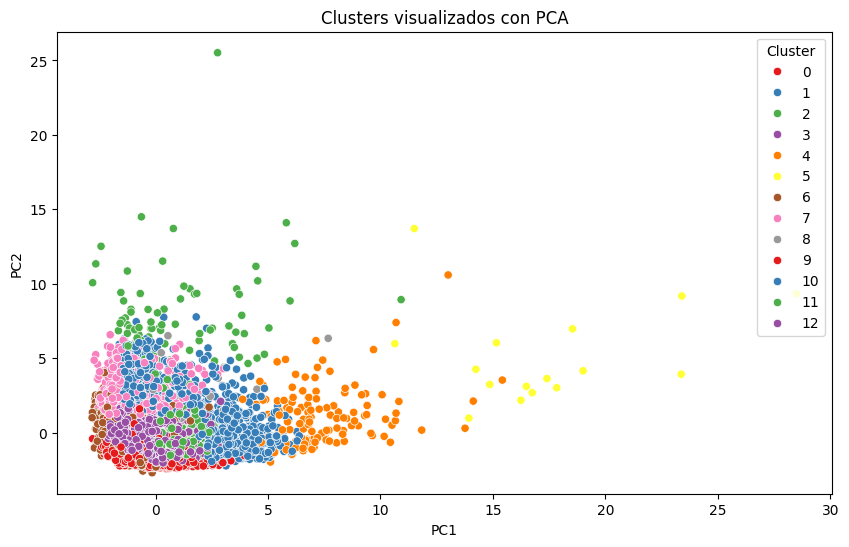

In [54]:
# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_train)

# Crear un DataFrame con los datos transformados
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y_pred

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters visualizados con PCA')
plt.show()


## **7. Guardar el Modelo para Futuros Usos**

In [ ]:
# Guardar el modelo de K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')

# Guardar el escalador para futuras transformaciones
joblib.dump(scaler, 'scaler.pkl')